In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, date

In [33]:
# Read data
df = pd.read_csv('../rawdata/traffic-CollisionRecords.csv')
print df.shape

# Drop non-pedestrian accidents
df = df[pd.notnull(df['PEDESTRIAN_ACCIDENT'])].copy()

print df.shape

# Read geocode latlong
geocode = pd.read_csv('../scripts/data_geocoded.txt',sep='|',header=None,names=['CASE_ID','PRIMARY_RD','SECONDARY_RD','y','x'])
print geocode.shape

# Join data
df.reset_index(inplace=True)
df = df.merge(geocode[['CASE_ID','x','y']],how="inner",left_on="CASE_ID",right_on="CASE_ID")
print df.shape


(59368, 76)
(10479, 76)
(10479, 5)
(10479, 79)


In [34]:
df.dtypes

index                        int64
CASE_ID                      int64
ACCIDENT_YEAR                int64
PROC_DATE                    int64
JURIS                        int64
COLLISION_DATE               int64
COLLISION_TIME               int64
OFFICER_ID                  object
REPORTING_DISTRICT          object
DAY_OF_WEEK                  int64
CHP_SHIFT                    int64
POPULATION                   int64
CNTY_CITY_LOC                int64
SPECIAL_COND                 int64
BEAT_TYPE                    int64
CHP_BEAT_TYPE                int64
CITY_DIVISION_LAPD         float64
CHP_BEAT_CLASS               int64
BEAT_NUMBER                 object
PRIMARY_RD                  object
SECONDARY_RD                object
DISTANCE                   float64
DIRECTION                   object
INTERSECTION                object
WEATHER_1                   object
WEATHER_2                   object
STATE_HWY_IND               object
CALTRANS_COUNTY             object
CALTRANS_DISTRICT   

In [35]:
keepcols = [
    'COLLISION_DATE',
    'COLLISION_TIME',
    'DAY_OF_WEEK',
    'PRIMARY_RD',
    'SECONDARY_RD',
    'INTERSECTION',
    'WEATHER_1',
    'WEATHER_2',
    'LOCATION_TYPE',
    'PRIMARY_COLL_FACTOR',
    'PCF_VIOL_CATEGORY',
    'HIT_AND_RUN',
    'TYPE_OF_COLLISION',
    'PED_ACTION',
    'ROAD_SURFACE',
    'ROAD_COND_1',
    'ROAD_COND_2',
    'LIGHTING',
    'PEDESTRIAN_ACCIDENT',
    'ALCOHOL_INVOLVED',
    'STWD_VEHTYPE_AT_FAULT',
    'CHP_VEHTYPE_AT_FAULT',
    'COUNT_PED_KILLED',
    'COUNT_PED_INJURED',
    'LATITUDE',
    'LONGITUDE',
    'y',
    'x'
    ]

df = df[keepcols]

In [36]:
df.describe()

,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,COUNT_PED_KILLED,COUNT_PED_INJURED,LATITUDE,LONGITUDE,y,x
count,1.047900e+04,10479.000000,10479.000000,10479.000000,10479.000000,5.000000,5.000000,10479.000000,10479.000000
mean,2.009211e+07,1399.036168,3.871266,0.022044,0.987403,37.758102,122.424962,37.758120,-122.409674
std,3.784255e+04,565.013679,1.897732,0.146834,0.334493,0.029137,0.027868,0.526888,0.886655
min,2.003010e+07,1.000000,1.000000,0.000000,0.000000,37.715420,122.400320,9.923038,-122.511211
25%,2.006050e+07,1000.000000,2.000000,0.000000,1.000000,37.742370,122.408790,37.754158,-122.439466
50%,2.009101e+07,1500.000000,4.000000,0.000000,1.000000,37.766620,122.419360,37.776721,-122.419562
75%,2.012101e+07,1827.000000,5.000000,0.000000,1.000000,37.780910,122.424410,37.786292,-122.408639
max,2.016030e+07,2500.000000,7.000000,1.000000,5.000000,37.785190,122.471930,37.933986,-69.383245


In [45]:
df.LIGHTING.value_counts()

A    6474
C    3444
B     390
-      79
D      66
E      26
Name: LIGHTING, dtype: int64

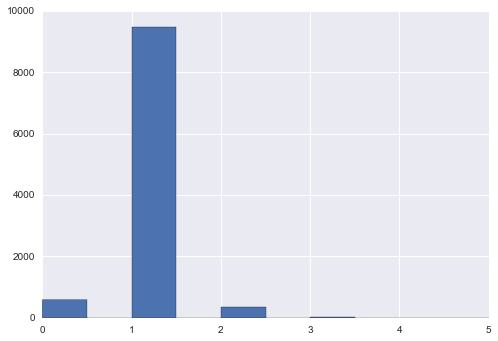

In [24]:
df.COUNT_PED_INJURED.hist()